In [143]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


!pip install isodate



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\match\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\match\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
api_key = 


In [5]:
channel_ids = ['UCUCeZaZeJbEYAAzvMgrKOPQ','UCln9P4Qm3-EAY4aiEPmRwEA',
               'UCCRb6nYKaT8tzLA8CwDdUtw','UCUXfRsEIJ9xO1DT7TbEWksw','UCvpredjG93ifbCP1Y77JyFA','UCzycs8MqvIY4nXWwS-v4J9g',
              'UCOTR1tcOAhjgi6YukrPpZxg','UCP7Gw_YZAuh4Yg2fcdcuumQ','UC3vg17IZ1IV73xx069jG44w','UCNIy6zQyP7SuLEIaiwymfUA',
              'UCRIgIJQWuBJ0Cv_VlU3USNA','UC33_tIj4m1_XaqfFcomShvw','UCxjXU89x6owat9dA8Z-bzdw','UCIVqvhyo8ttjYOmMJuhq_YQ',
              'UCAaGaynFpku5cAx6OOSrW-w']

In [6]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)


In [55]:
  def get_channel_stats(youtube, channel_ids):
    
    """
    Get channel stats
    
    Params:
    ------
    youtube: build object of Youtube API
    channel_ids: list of channel IDs
    
    Returns:
    ------
    dataframe with all channel stats for each channel ID
    
    """
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()

    # loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
        
    return pd.DataFrame(all_data)

def get_video_ids(youtube, playlist_ids):
    video_ids = []
    for playlist_id in playlist_ids:
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId=playlist_id,
            maxResults=50
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        while next_page_token is not None:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page_token
            )
            response = request.execute()

            for item in response['items']:
                video_ids.append(item['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_ids

    
    
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)



In [8]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [109]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId,avgViews
0,HoneyWorks OFFICIAL,2460000,1022767381,360,UUAaGaynFpku5cAx6OOSrW-w,2.841021e+06
1,Fujii Kaze,2980000,965489267,181,UUNIy6zQyP7SuLEIaiwymfUA,5.334195e+06
2,AKB48,2580000,2209450403,3478,UUxjXU89x6owat9dA8Z-bzdw,6.352646e+05
3,TWICE JAPAN OFFICIAL YouTube Channel,4690000,1601620802,196,UUCRb6nYKaT8tzLA8CwDdUtw,8.171535e+06
4,Ado,4780000,1947662154,103,UUln9P4Qm3-EAY4aiEPmRwEA,1.890934e+07
5,ヨルシカ / n-buna Official,2660000,1570860665,53,UURIgIJQWuBJ0Cv_VlU3USNA,2.963888e+07
6,RADWIMPS,2580000,1768299823,253,UUIVqvhyo8ttjYOmMJuhq_YQ,6.989327e+06
7,まふまふちゃんねる,3510000,2056367557,417,UUOTR1tcOAhjgi6YukrPpZxg,4.931337e+06
8,Official髭男dism,3120000,2521635043,107,UU3vg17IZ1IV73xx069jG44w,2.356668e+07
9,ARASHI,3270000,817624398,59,UUP7Gw_YZAuh4Yg2fcdcuumQ,1.385804e+07


In [ ]:
# Convert count columns to numeric
num_cols = ['subscribers', 'views', 'totalVideos']
channel_stats[num_cols] = channel_stats[num_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [57]:
playlist_ids = ['UUAaGaynFpku5cAx6OOSrW-w','UUNIy6zQyP7SuLEIaiwymfUA','UUxjXU89x6owat9dA8Z-bzdw',  'UUCRb6nYKaT8tzLA8CwDdUtw','UUln9P4Qm3-EAY4aiEPmRwEA','UURIgIJQWuBJ0Cv_VlU3USNA',                 'UUIVqvhyo8ttjYOmMJuhq_YQ','UUOTR1tcOAhjgi6YukrPpZxg','UUOTR1tcOAhjgi6YukrPpZxg',                 'UU3vg17IZ1IV73xx069jG44w','UUP7Gw_YZAuh4Yg2fcdcuumQ','UUzycs8MqvIY4nXWwS-v4J9g',                 'UUvpredjG93ifbCP1Y77JyFA','UU33_tIj4m1_XaqfFcomShvw','UUUCeZaZeJbEYAAzvMgrKOPQ',                 'UUUXfRsEIJ9xO1DT7TbEWksw']

video_ids = get_video_ids(youtube, playlist_ids)



In [58]:
len(video_ids)

6347

In [59]:
# Get video details
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,cTDrFjf5-Oc,HoneyWorks OFFICIAL,FAKE STAR／Full Throttle4（Vo：斉藤壮馬・内田雄馬）#Shorts,#FAKESTAR／#FullThrottle4（Vo：#斉藤壮馬・#内田雄馬）\nhttp...,"[HoneyWorks, ハニワ, Full Throttle4, FT4, ふてほ, YU...",2023-03-07T11:00:33Z,20875,3603,None,48,PT28S,hd,false
1,uOQvbUJhf-E,HoneyWorks OFFICIAL,LOVE ANTHEM／Full Throttle4（Vo：斉藤壮馬・内田雄馬）,#LOVEANTHEM／#FullThrottle4（Vo：#斉藤壮馬・#内田雄馬）\nht...,"[HoneyWorks, ハニワ, Full Throttle4, FT4, ふてほ, YU...",2023-03-06T11:00:43Z,26235,4650,None,56,PT32S,hd,false
2,0EZobuvbbKM,HoneyWorks OFFICIAL,東京ウインターセッション feat. 瀬戸口優・榎本夏樹・望月蒼太・早坂あかり・芹沢春輝・合...,#東京ウインターセッション feat. #瀬戸口優・#榎本夏樹・#望月蒼太・#早坂あかり・#...,"[HoneyWorks, ハニワ, 東京ウインターセッション, サマセ, スプセ, オータム...",2023-03-05T11:00:00Z,33494,5451,None,49,PT44S,hd,false
3,Z9ociQHCGf8,HoneyWorks OFFICIAL,東京スプリングセッション feat. 瀬戸口優・榎本夏樹・望月蒼太・早坂あかり・芹沢春輝・合...,#東京スプリングセッション feat. #瀬戸口優・#榎本夏樹・#望月蒼太・#早坂あかり・#...,"[HoneyWorks, ハニワ, 東京スプリングセッション, スプセ, サマセ, オータム...",2023-03-04T11:00:19Z,58956,8779,None,112,PT24S,hd,false
4,JY7kjKmoPrg,HoneyWorks OFFICIAL,レンズ越しの景色 feat. 山本幸大（CV：松岡禎丞）#Shorts,#レンズ越しの景色 feat. #山本幸大（CV：#松岡禎丞）\nhttps://youtu...,"[HoneyWorks, ハニワ, レンズ越しの景色, レンズ越し, マキアート, こうじゅ...",2023-03-03T11:00:12Z,25124,4484,None,62,PT41S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,CUcVkIBWM2A,Eve,ドーナツホール 歌ってみた【Eve】,ハチさんのドーナツホールを歌わせて頂きました◎\n本家様：sm22138447 \n\nMy...,"[ドーナツホール, ハチ, Eve(歌い手), Eve, 夏代孝明, 米津玄師, VOCAL...",2014-06-13T11:57:47Z,4553663,65266,None,1707,PT3M31S,hd,true
6343,9xohNdXZdtM,Eve,新宿シック 歌ってみた【Eve】,宜しくお願いします。\n\n本家様：sm23566939 \n\nMy name is Ev...,"[歌ってみた, VOCALOID, 新宿シック, Task, GUMI, 歌い手, Eve(...",2014-06-07T01:21:51Z,739008,14180,None,362,PT3M58S,hd,false
6344,3uyGM64fqzk,Eve,ウミユリ海底譚 歌ってみた【Eve】,ナブナ様のウミユリ海底譚を歌いました。\n本家様：http://www.nicovideo....,"[歌ってみた, Eve(歌い手), ナブナ, ウミユリ海底譚, VOCALOID]",2014-05-08T14:56:15Z,5306671,94510,None,2337,PT3M59S,hd,true
6345,xxtyNlWKuLY,Eve,アルカリ成人 歌ってみた【Eve】,ただのCo様のアルカリ成人を歌いました。\n本家様：http://www.nicovideo...,"[歌ってみた, ただのCo, Eve(歌い手), Vocaloid, 歌い手, VOCALO...",2014-03-21T14:01:36Z,1194380,21132,None,358,PT3M51S,hd,false


Data Pre-Processing

In [60]:
# Check for NULL values
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount          True
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [61]:
# Check data types
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [62]:
# Convert count columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [63]:

# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [67]:

# convert duration to seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [69]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [ ]:
video_df

## Exploratory Data Analysis

Best performing videos

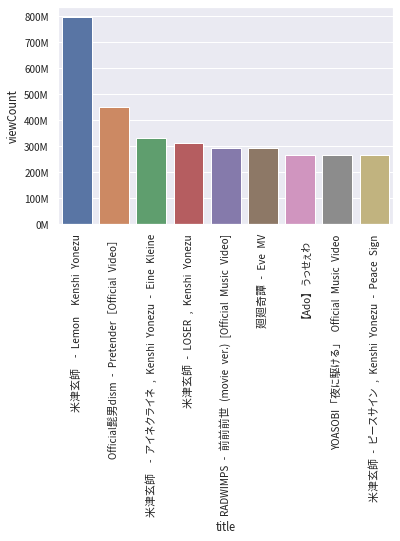

In [195]:
plt.rcParams['font.family'] = 'JapanSans90'

def k_formatter(x, pos):
    return '{:,.0f}K'.format(x/1000)

def m_formatter(x, pos):
    return '{:,.0f}M'.format(x/1000000)

def b_formatter(x, pos):
    return '{:,.1f}B'.format(x/1000000000)


ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(m_formatter))

Lemon is the winner by far- I knew it was popular, but didn't know it was THAT popular. Of course, compared to the top Kpop songs, the view count may not be that high... but that's for a different analysis.
In any case, Kenshi dominates this chart.
It's even more clear when we look at channels by average views-

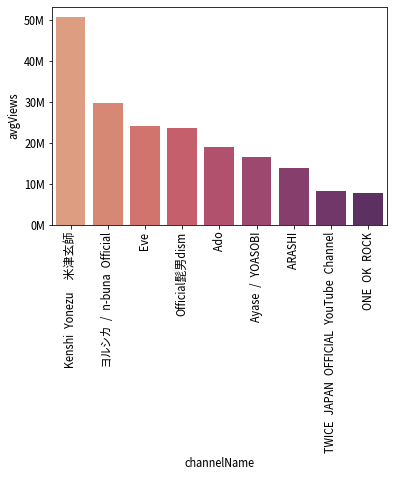

In [108]:
channel_stats['avgViews'] = channel_stats['views'] / channel_stats['totalVideos']




ax = sns.barplot(x = 'channelName', y = 'avgViews', data = channel_stats.sort_values('avgViews', ascending=False)[0:9], 
                 palette='flare')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(m_formatter))

Of course, this is based on the style of the channel too. Kenshi posts very little other than his megafamous songs, whereas AKB48 is most certainly dead last posts lots of different types of videos. And a LOT of them.

In [115]:
# Create average comments column
total_comment_count = video_df.groupby('channelTitle')['commentCount'].sum().reset_index()

# merge with channel_stats using a left join
channel_stats = channel_stats.merge(total_comment_count, left_on='channelName', right_on='channelTitle', how='left')
channel_stats.drop('channelTitle', axis=1, inplace=True)

# rename the commentCount column
channel_stats.rename(columns={'commentCount': 'totalCommentCount'}, inplace=True)

channel_stats['avgComments'] = channel_stats['totalCommentCount'] / channel_stats['totalVideos]

channel_stats

,channelName,subscribers,views,totalVideos,playlistId,avgViews,totalCommentCount,avgComments,totalCommentCount,totalCommentCount,totalCommentCount,totalCommentCount,totalCommentCount
0,HoneyWorks OFFICIAL,2460000,1022767381,360,UUAaGaynFpku5cAx6OOSrW-w,2.841021e+06,616184,1711.622222,616184,616184,616184,616184.0,616184.0
1,Fujii Kaze,2980000,965489267,181,UUNIy6zQyP7SuLEIaiwymfUA,5.334195e+06,441389,2438.613260,441389,441389,441389,441389.0,441389.0
2,AKB48,2580000,2209450403,3478,UUxjXU89x6owat9dA8Z-bzdw,6.352646e+05,656306,188.702128,656306,656306,656306,656306.0,656306.0
3,TWICE JAPAN OFFICIAL YouTube Channel,4690000,1601620802,196,UUCRb6nYKaT8tzLA8CwDdUtw,8.171535e+06,1891324,9649.612245,1891324,1891324,1891324,1891324.0,1891324.0
4,Ado,4780000,1947662154,103,UUln9P4Qm3-EAY4aiEPmRwEA,1.890934e+07,779011,7563.213592,779011,779011,779011,779011.0,779011.0
5,ヨルシカ / n-buna Official,2660000,1570860665,53,UURIgIJQWuBJ0Cv_VlU3USNA,2.963888e+07,364694,6881.018868,364694,364694,364694,364694.0,364694.0
6,RADWIMPS,2580000,1768299823,253,UUIVqvhyo8ttjYOmMJuhq_YQ,6.989327e+06,505329,1997.347826,505329,505329,505329,505329.0,505329.0
7,まふまふちゃんねる,3510000,2056367557,417,UUOTR1tcOAhjgi6YukrPpZxg,4.931337e+06,3653294,8760.896882,3653294,3653294,3653294,3653294.0,3653294.0
8,Official髭男dism,3120000,2521635043,107,UU3vg17IZ1IV73xx069jG44w,2.356668e+07,498464,4658.542056,498464,498464,498464,498464.0,498464.0
9,ARASHI,3270000,817624398,59,UUP7Gw_YZAuh4Yg2fcdcuumQ,1.385804e+07,574377,9735.203390,574377,574377,574377,574377.0,574377.0


In [166]:
# Create average likes column
total_comment_count = video_df.groupby('channelTitle')['likeCount'].sum().reset_index()

# merge with channel_stats using a left join
channel_stats = channel_stats.merge(total_comment_count, left_on='channelName', right_on='channelTitle', how='left')
channel_stats.drop('channelTitle', axis=1, inplace=True)

# rename the commentCount column
channel_stats.rename(columns={'likeCount': 'totalLikeCount'}, inplace=True)

channel_stats['avgLikes'] = channel_stats['totalLikeCount'] / channel_stats['totalVideos']

channel_stats

,channelName,subscribers,views,totalVideos,playlistId,avgViews,totalCommentCount,avgComments,totalLikeCount,avgLikes
0,HoneyWorks OFFICIAL,2460000,1022767381,360,UUAaGaynFpku5cAx6OOSrW-w,2.841021e+06,616184,1711.622222,16506497.0,45851.380556
1,Fujii Kaze,2980000,965489267,181,UUNIy6zQyP7SuLEIaiwymfUA,5.334195e+06,441389,2438.613260,12780783.0,70612.060773
2,AKB48,2580000,2209450403,3478,UUxjXU89x6owat9dA8Z-bzdw,6.352646e+05,656306,188.702128,8476798.0,2437.262220
3,TWICE JAPAN OFFICIAL YouTube Channel,4690000,1601620802,196,UUCRb6nYKaT8tzLA8CwDdUtw,8.171535e+06,1891324,9649.612245,34991955.0,178530.382653
4,Ado,4780000,1947662154,103,UUln9P4Qm3-EAY4aiEPmRwEA,1.890934e+07,779011,7563.213592,21080784.0,204667.805825
5,ヨルシカ / n-buna Official,2660000,1570860665,53,UURIgIJQWuBJ0Cv_VlU3USNA,2.963888e+07,364694,6881.018868,11426996.0,215603.698113
6,RADWIMPS,2580000,1768299823,253,UUIVqvhyo8ttjYOmMJuhq_YQ,6.989327e+06,505329,1997.347826,11593421.0,45823.798419
7,まふまふちゃんねる,3510000,2056367557,417,UUOTR1tcOAhjgi6YukrPpZxg,4.931337e+06,3653294,8760.896882,71389978.0,171198.988010
8,Official髭男dism,3120000,2521635043,107,UU3vg17IZ1IV73xx069jG44w,2.356668e+07,498464,4658.542056,11723658.0,109566.897196
9,ARASHI,3270000,817624398,59,UUP7Gw_YZAuh4Yg2fcdcuumQ,1.385804e+07,574377,9735.203390,5.0,0.084746


In [167]:
# Converting to integer
channel_stats['avgLikes'] = channel_stats['avgLikes'].astype(int)
channel_stats['totalLikeCount'] = channel_stats['totalLikeCount'].astype(int)
channel_stats

,channelName,subscribers,views,totalVideos,playlistId,avgViews,totalCommentCount,avgComments,totalLikeCount,avgLikes
0,HoneyWorks OFFICIAL,2460000,1022767381,360,UUAaGaynFpku5cAx6OOSrW-w,2.841021e+06,616184,1711.622222,16506497,45851
1,Fujii Kaze,2980000,965489267,181,UUNIy6zQyP7SuLEIaiwymfUA,5.334195e+06,441389,2438.613260,12780783,70612
2,AKB48,2580000,2209450403,3478,UUxjXU89x6owat9dA8Z-bzdw,6.352646e+05,656306,188.702128,8476798,2437
3,TWICE JAPAN OFFICIAL YouTube Channel,4690000,1601620802,196,UUCRb6nYKaT8tzLA8CwDdUtw,8.171535e+06,1891324,9649.612245,34991955,178530
4,Ado,4780000,1947662154,103,UUln9P4Qm3-EAY4aiEPmRwEA,1.890934e+07,779011,7563.213592,21080784,204667
5,ヨルシカ / n-buna Official,2660000,1570860665,53,UURIgIJQWuBJ0Cv_VlU3USNA,2.963888e+07,364694,6881.018868,11426996,215603
6,RADWIMPS,2580000,1768299823,253,UUIVqvhyo8ttjYOmMJuhq_YQ,6.989327e+06,505329,1997.347826,11593421,45823
7,まふまふちゃんねる,3510000,2056367557,417,UUOTR1tcOAhjgi6YukrPpZxg,4.931337e+06,3653294,8760.896882,71389978,171198
8,Official髭男dism,3120000,2521635043,107,UU3vg17IZ1IV73xx069jG44w,2.356668e+07,498464,4658.542056,11723658,109566
9,ARASHI,3270000,817624398,59,UUP7Gw_YZAuh4Yg2fcdcuumQ,1.385804e+07,574377,9735.203390,5,0


# Audience Interaction Level

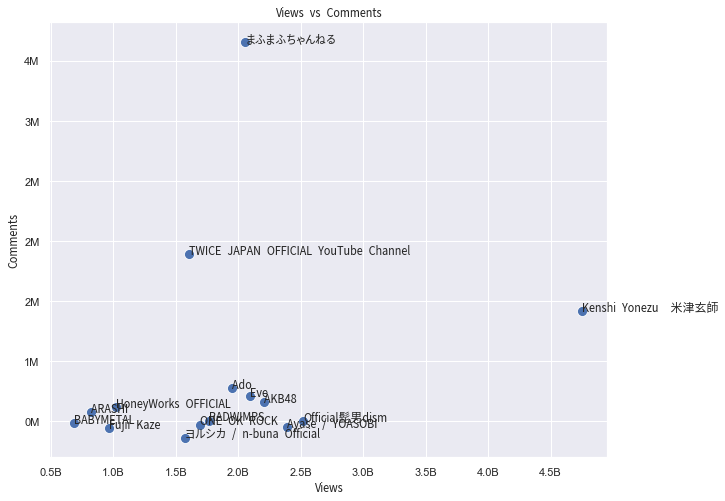

In [161]:
# Views vs Comments
sns.set_style('darkgrid')

plt.figure(figsize=(10,8))
sns.scatterplot(x='views', y='totalCommentCount', data=channel_stats, s=100)

# add text labels for each point
for i in range(channel_stats.shape[0]):
    plt.text(channel_stats['views'][i], channel_stats['totalCommentCount'][i], channel_stats['channelName'][i], fontdict={'fontname': 'JapanSans90'}, fontsize=12)

plt.title('Views vs Comments', fontname='JapanSans90')
plt.xlabel('Views', fontname='JapanSans90')
plt.ylabel('Comments', fontname='JapanSans90')
plt.gca().get_yaxis().set_major_formatter(m_formatter)
plt.gca().get_xaxis().set_major_formatter(b_formatter)
plt.show()


Mafumafu appears to be the clear winner in audience interaction. Twice being as big as it is no surprise, but I don't actually know that much about mafumafu despite having heard a lot of his songs, I think he has more to do with vocaloid? More of an internet figure than the rest, who are either pop groups or pop stars. 

Let's look at videos!

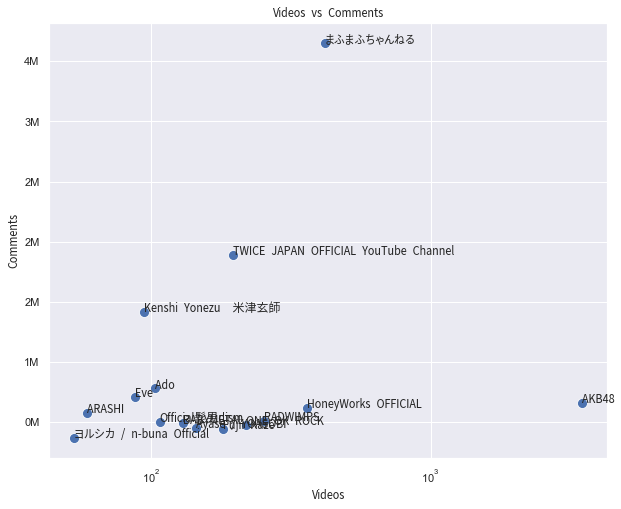

In [196]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,8))
sns.scatterplot(x='totalVideos', y='totalCommentCount', data=channel_stats, s=100,)

# add text labels for each point
for i in range(channel_stats.shape[0]):
    plt.text(channel_stats['totalVideos'][i], channel_stats['totalCommentCount'][i], channel_stats['channelName'][i], fontdict={'fontname': 'JapanSans90'}, fontsize=12)

plt.title('Videos vs Comments', fontname='JapanSans90')
plt.xlabel('Videos', fontname='JapanSans90')
plt.ylabel('Comments', fontname='JapanSans90')
plt.gca().get_yaxis().set_major_formatter(m_formatter)
plt.xscale('log')

plt.show()



Pretty much the same, AKB48 has tons of lower viewed videos (they're kind of an older group).
However, you can see that mafumafu has way more videos than kenshi, despite lower views overall. 
Looking closer, comparing specific videos- mafumafu's "Role Playing Game", vs Kenshi Yonezu's "Donut Hole
mafumafu has 30k comments, whil kenshi has 12k.
Life hates us has 80k, at 140 million views (1750 views per comment), while Kenshi's paprika, at 140 has 62k (2250~ views per comment)....
Kenshi's Lemon has 800million views, and 235k comments (3404 views per comment). Obviously mafumafu, or rather none of the other channels have such as successful video- but comments dont grow at the same rate. In this case, mafumafu's Life hates us has twice the comments:view ratio compared to Lemon- could be because very popular songs like Lemon are replayed more often by the same people.

Finally, a look at likes to see if it is similar:

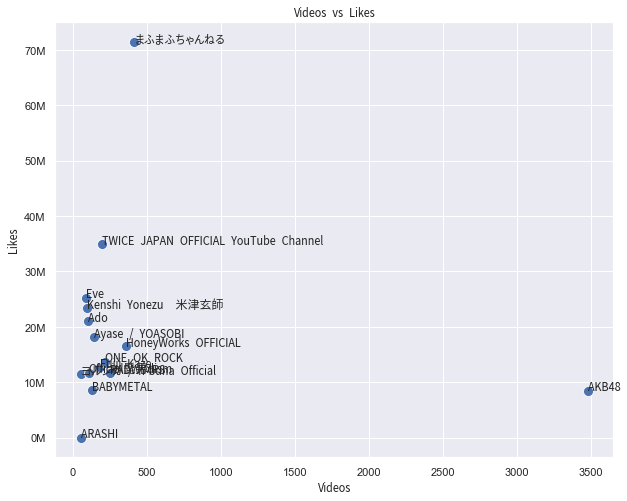

In [168]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,8))
sns.scatterplot(x='totalVideos', y='totalLikeCount', data=channel_stats, s=100,)

# add text labels for each point
for i in range(channel_stats.shape[0]):
    plt.text(channel_stats['totalVideos'][i], channel_stats['totalLikeCount'][i], channel_stats['channelName'][i], fontdict={'fontname': 'JapanSans90'}, fontsize=12)

plt.title('Videos vs Likes', fontname='JapanSans90')
plt.xlabel('Videos', fontname='JapanSans90')
plt.ylabel('Likes', fontname='JapanSans90')
plt.gca().get_yaxis().set_major_formatter(m_formatter)

plt.show()


# Average Duration of Videos

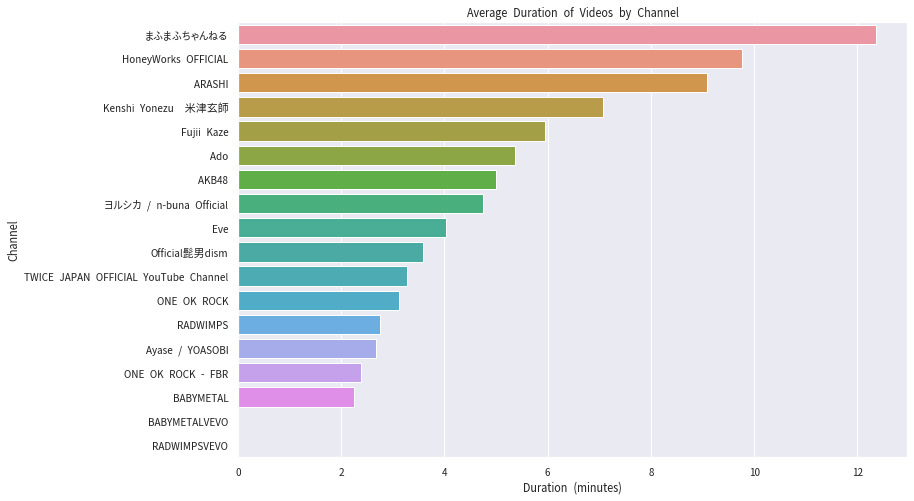

In [177]:
# Calculate the average duration of each channel's videos in minutes
avg_duration = video_df.groupby('channelTitle')['durationSecs'].mean().reset_index()
avg_duration['durationMins'] = avg_duration['durationSecs'] / 60

# Sort the values in descending order
avg_duration = avg_duration.sort_values('durationSecs', ascending=False)

# Plot the results using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'JapanSans90'
sns.barplot(x='durationMins', y='channelTitle', data=avg_duration)
plt.title('Average Duration of Videos by Channel')
plt.xlabel('Duration (minutes)')
plt.ylabel('Channel')
plt.show()



Mafumafu does some long streams, so that's pulled up his average views despite most of his popular videos being song covers. 




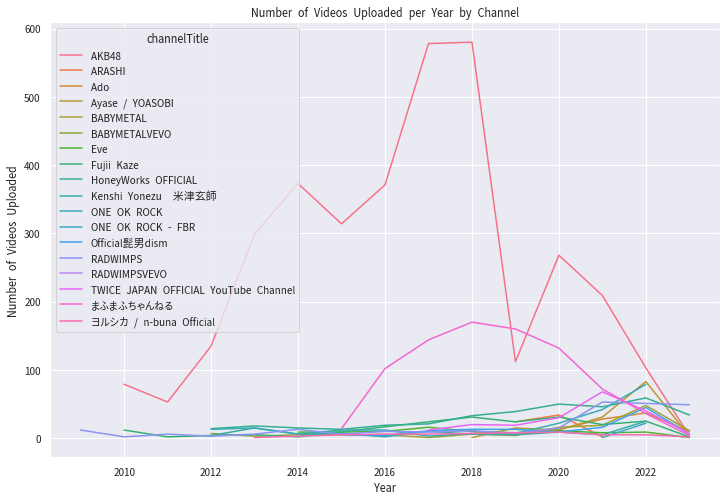

In [170]:

# Convert the publishedAt column to a datetime object
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])

# Extract the year from the publishedAt column and create a new column for it
video_df['year'] = video_df['publishedAt'].dt.year

# Group the videos by channel and year, and count the number of videos in each group
video_counts = video_df.groupby(['channelTitle', 'year'])['video_id'].count().reset_index()
video_counts.rename(columns={'video_id': 'num_videos'}, inplace=True)

# Plot the results using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'JapanSans90'
sns.lineplot(x='year', y='num_videos', hue='channelTitle', data=video_counts)
plt.title('Number of Videos Uploaded per Year by Channel')
plt.xlabel('Year')
plt.ylabel('Number of Videos Uploaded')
plt.show()

Removing the big ones, AKB48 and mafumafu to take a closer look at the rest

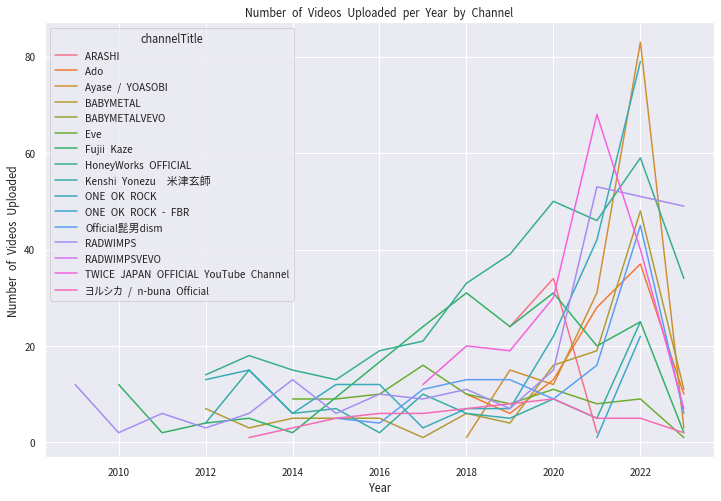

In [173]:
# Filter out the unwanted channels
video_counts_filtered = video_counts[~video_counts['channelTitle'].isin(['AKB48', 'まふまふちゃんねる'])]

# Plot the results using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'JapanSans90'
sns.lineplot(x='year', y='num_videos', hue='channelTitle', data=video_counts_filtered)
plt.title('Number of Videos Uploaded per Year by Channel')
plt.xlabel('Year')
plt.ylabel('Number of Videos Uploaded')
plt.show()

Honestly, not much to be seen here. Again, video upload rate is mostly based on the style of the channel

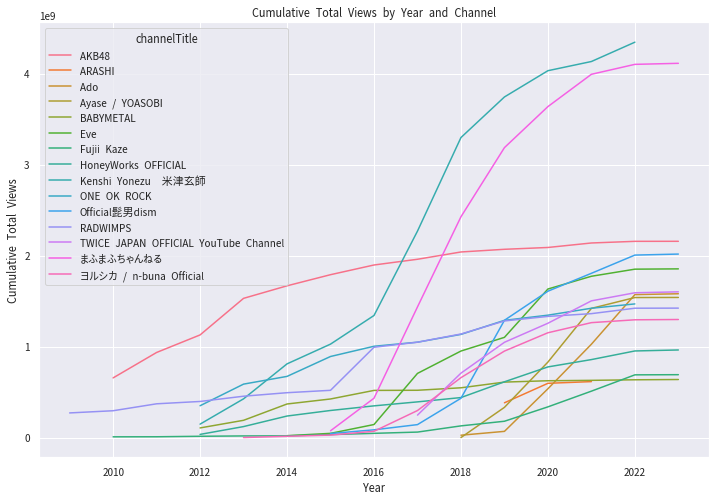

In [185]:
video_df['channelTitle'] = video_df['channelTitle'].replace({'BABYMETALVEVO': 'BABYMETAL', 'RADWIMPSVEVO': 'RADWIMPS','ONE OK ROCK - FBR' : 'ONE OK ROCK'})


# Group the videos by channel and year, and calculate the sum of the viewCount column
views_by_year = video_df.groupby(['channelTitle', video_df['publishedAt'].dt.year])['viewCount'].sum().reset_index()

# Calculate the cumulative sum of views for each channel
views_by_year['cumulative_views'] = views_by_year.groupby('channelTitle')['viewCount'].cumsum()

# Plot the results using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'JapanSans90'
sns.lineplot(x='publishedAt', y='cumulative_views', hue='channelTitle', data=views_by_year)
plt.title('Cumulative Total Views by Year and Channel')
plt.xlabel('Year')
plt.ylabel('Cumulative Total Views')
plt.show()


Both kenshi and mafumafu seem to have had their sudden growth in popularity around 2017-2020. 

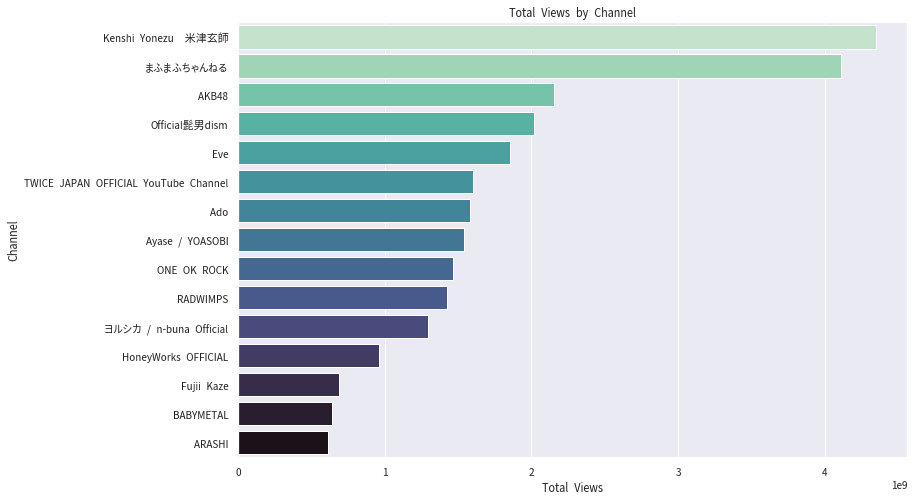

In [199]:
# Consolidate channels
video_df['channelTitle'] = video_df['channelTitle'].replace({'BABYMETALVEVO': 'BABYMETAL', 'RADWIMPSVEVO': 'RADWIMPS','ONE OK ROCK - FBR' : 'ONE OK ROCK'})

# Calculate the total views for each channel
views_by_channel = video_df.groupby('channelTitle')['viewCount'].sum().reset_index()

# Sort the values in descending order
views_by_channel = views_by_channel.sort_values('viewCount', ascending=False)

# Plot the results using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'JapanSans90'
sns.barplot(x='viewCount', y='channelTitle', data=views_by_channel, palette = 'mako_r')
plt.title('Total Views by Channel')
plt.xlabel('Total Views')
plt.ylabel('Channel')
plt.show()


(A quick reference for the line chart above, since it's kind of hard to differentiate colors. This makes it clear the two super-lines are kenshi and mafumafu)

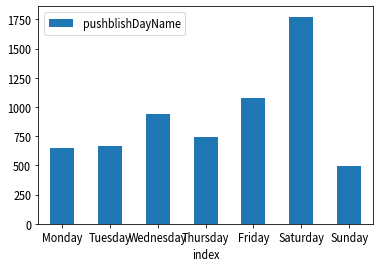

In [89]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)

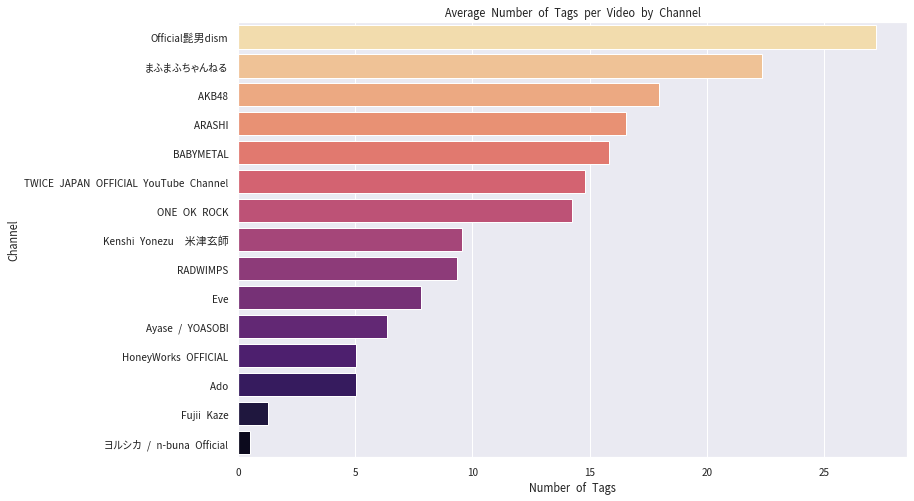

In [192]:


# Calculate the average number of tags per video for each channel
avg_tags = video_df.groupby('channelTitle')['tagCount'].mean().reset_index()

# Sort the values in descending order
avg_tags = avg_tags.sort_values('tagCount', ascending=False)

# Plot the results using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'JapanSans90'
sns.barplot(x='tagCount', y='channelTitle', data=avg_tags, palette = 'magma_r')
plt.title('Average Number of Tags per Video by Channel')
plt.xlabel('Number of Tags')
plt.ylabel('Channel')
plt.show()


There doesn't seem to be a big difference in views, so Youtube is probably right when they say tags don't really matter. Especially at such a high level.

# Conclusion

Nice look at statistics for those interested in Jpop. While there are many other big names such as King Gnu, Lisa, etc. that I unfortunately did not get to, it would be easy to add them in the future for those interested. Another interesting comparison could be between genres/types, which I did not categorize by because there are too few channels here.